# Phase 2
 Data preprocessing and analysis
#### Sama Amr -- 900211296  & Farida Madkour -- 900211360

In [ ]:
import warnings
warnings.filterwarnings('ignore')
###

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("bankloan.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'bankloan.csv'

In [ ]:
df.info()
print("--------------------------------")
print("List of Columns:", df.columns)
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
--------------------------------
List of Columns: Index(

<AxesSubplot:>

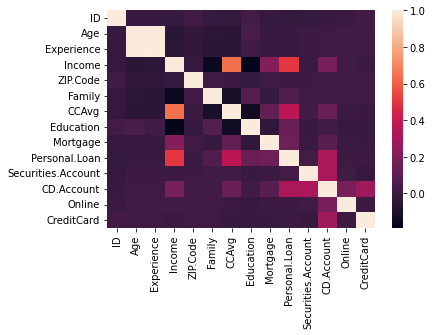

In [ ]:
sns.heatmap(df.corr(), annot=False)

Drop ID, experience, and Zip Code columns since they're irrelevant

In [ ]:
df = df.drop(columns=['ID','Experience','ZIP.Code'])
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


Check for missing values

In [ ]:
df.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

Therefore, there is no missing values as specified by the non-null count and the sum calculated

Check for duplicate values and drop them

In [ ]:
df.duplicated().sum()

13

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Encodings

Change numeric/continous variables to type float and categorical/discrete variable to type category

In [ ]:
df['Income']=df['Income'].astype('float')
df['Family']=df['Family'].astype('category')
df['Education']=df['Education'].astype('category')
df['CCAvg']=df['CCAvg'].astype('float')
df['Mortgage']=df['Mortgage'].astype('float')
df['Personal.Loan']=df['Personal.Loan'].astype('category')
df['Securities.Account']=df['Securities.Account'].astype('category')
df['CD.Account']=df['CD.Account'].astype('category')
df['Online']=df['Online'].astype('category')
df['CreditCard']=df['CreditCard'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4987 non-null   int64   
 1   Income              4987 non-null   float64 
 2   Family              4987 non-null   category
 3   CCAvg               4987 non-null   float64 
 4   Education           4987 non-null   category
 5   Mortgage            4987 non-null   float64 
 6   Personal.Loan       4987 non-null   category
 7   Securities.Account  4987 non-null   category
 8   CD.Account          4987 non-null   category
 9   Online              4987 non-null   category
 10  CreditCard          4987 non-null   category
dtypes: category(7), float64(3), int64(1)
memory usage: 229.8 KB


Cut the Age and income into Ranges for better interpretations

In [ ]:
#minimum age = 23
#maximum age = 67
bins = [23,30,40,50,60,70]
df['Age_r'] = pd.cut(df['Age'], bins=bins, labels=['23-30', '30-40', '40-50', '50-60','60-70'])

#minimum age = 8
#maximum age = 224
bins = [8,20,100,150,200,250]
df['Income_r'] = pd.cut(df['Income'], bins=bins, labels=['Poor', 'Middle_Class', 'Upper_Class', 'Rich','Very_Rich'])
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard,Age_r,Income_r
0,25,49.0,4,1.6,1,0.0,0,1,0,0,0,23-30,Middle_Class
1,45,34.0,3,1.5,1,0.0,0,1,0,0,0,40-50,Middle_Class
2,39,11.0,1,1.0,1,0.0,0,0,0,0,0,30-40,Poor
3,35,100.0,1,2.7,2,0.0,0,0,0,0,0,30-40,Middle_Class
4,35,45.0,4,1.0,2,0.0,0,0,0,0,1,30-40,Middle_Class


Unique values of each of the variables

In [ ]:
print("Unique Family",pd.unique(df['Family']))
print("------------------------------------------")
print("Unique Education",pd.unique(df['Education']))
print("------------------------------------------")
print("Unique Personal.Loan",pd.unique(df['Personal.Loan']))
print("------------------------------------------")
print("Unique Securities.Account",pd.unique(df['Securities.Account']))
print("------------------------------------------")
print("Unique CD.Account",pd.unique(df['CD.Account']))
print("------------------------------------------")
print("Unique Online",pd.unique(df['Online']))
print("------------------------------------------")
print("Unique CreditCard",pd.unique(df['CreditCard']))

Unique Family [4, 3, 1, 2]
Categories (4, int64): [1, 2, 3, 4]
------------------------------------------
Unique Education [1, 2, 3]
Categories (3, int64): [1, 2, 3]
------------------------------------------
Unique Personal.Loan [0, 1]
Categories (2, int64): [0, 1]
------------------------------------------
Unique Securities.Account [1, 0]
Categories (2, int64): [0, 1]
------------------------------------------
Unique CD.Account [0, 1]
Categories (2, int64): [0, 1]
------------------------------------------
Unique Online [0, 1]
Categories (2, int64): [0, 1]
------------------------------------------
Unique CreditCard [0, 1]
Categories (2, int64): [0, 1]


Correlation Matrix  along with a heatmap for our Numerical/Continous Variables

In [ ]:
df.corr()

,Age,Income,CCAvg,Mortgage
Age,1.000000,-0.056897,-0.052522,-0.013014
Income,-0.056897,1.000000,0.646065,0.206420
CCAvg,-0.052522,0.646065,1.000000,0.109162
Mortgage,-0.013014,0.206420,0.109162,1.000000


<AxesSubplot:>

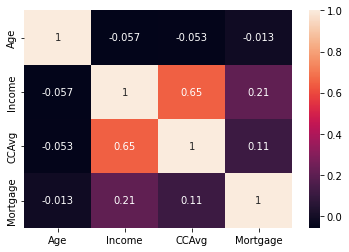

In [ ]:
sns.heatmap(df.corr(), annot=True)

Barplots for our Discrete variables to show their distributions

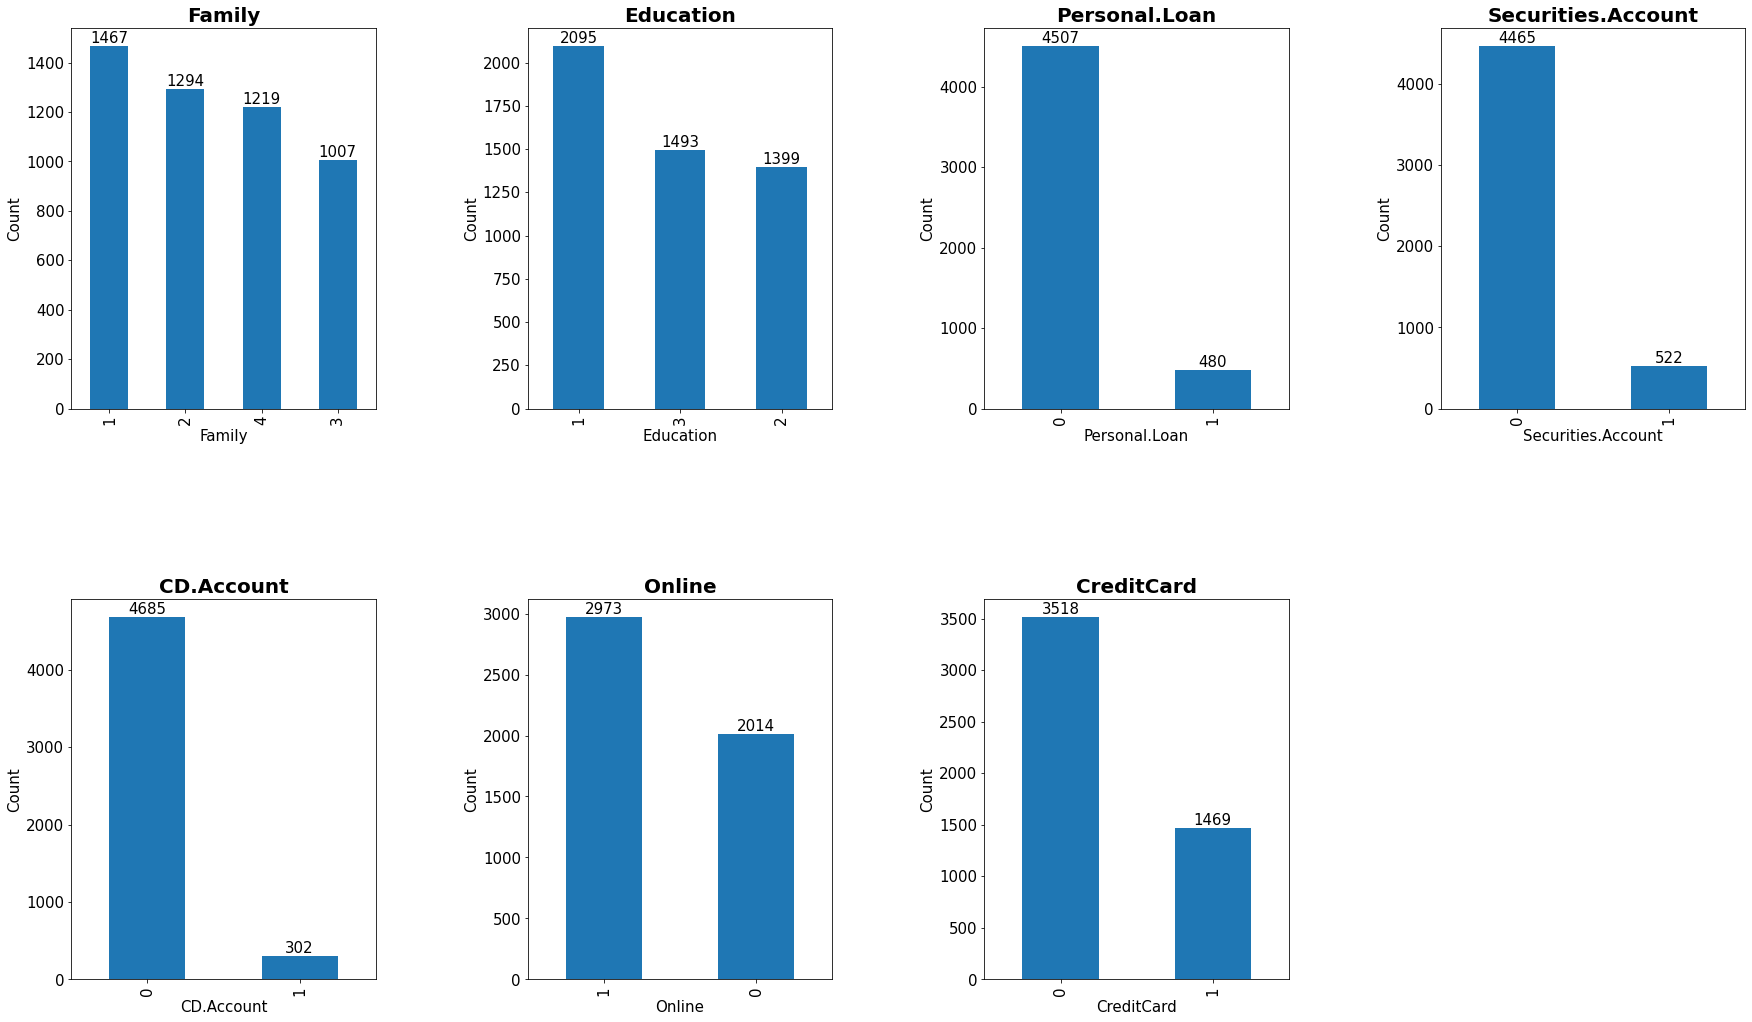

In [ ]:
plt.figure(figsize=(30,28))
plt.subplot(3,4,1)
df['Family'].value_counts().plot(kind='bar')
plt.title("Family", fontsize=20, fontweight="bold")
plt.xlabel('Family',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
counts=df['Family'].value_counts()
for i, count in enumerate (counts):
    plt.text(i,count+1,str(count), ha='center',va='bottom',fontsize=15)

plt.subplot(3,4,2)
df['Education'].value_counts().plot(kind='bar')
plt.title("Education", fontsize=20, fontweight="bold")
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
counts=df['Education'].value_counts()
for i, count in enumerate (counts):
    plt.text(i,count+1,str(count), ha='center',va='bottom',fontsize=15)

plt.subplot(3,4,3)
df['Personal.Loan'].value_counts().plot(kind='bar')
plt.title("Personal.Loan", fontsize=20, fontweight="bold")
plt.xlabel('Personal.Loan',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
counts=df['Personal.Loan'].value_counts()
for i, count in enumerate (counts):
    plt.text(i,count+1,str(count), ha='center',va='bottom',fontsize=15)

plt.subplot(3,4,4)
df['Securities.Account'].value_counts().plot(kind='bar')
plt.title("Securities.Account", fontsize=20, fontweight="bold")
plt.xlabel('Securities.Account',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
counts=df['Securities.Account'].value_counts()
for i, count in enumerate (counts):
    plt.text(i,count+1,str(count), ha='center',va='bottom',fontsize=15)

plt.subplot(3,4,5)
df['CD.Account'].value_counts().plot(kind='bar')
plt.title("CD.Account", fontsize=20, fontweight="bold")
plt.xlabel('CD.Account',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
counts=df['CD.Account'].value_counts()
for i, count in enumerate (counts):
    plt.text(i,count+1,str(count), ha='center',va='bottom',fontsize=15)

plt.subplot(3,4,6)
df['Online'].value_counts().plot(kind='bar')
plt.title("Online", fontsize=20, fontweight="bold")
plt.xlabel('Online',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
counts=df['Online'].value_counts()
for i, count in enumerate (counts):
    plt.text(i,count+1,str(count), ha='center',va='bottom',fontsize=15)

plt.subplot(3,4,7)
df['CreditCard'].value_counts().plot(kind='bar')
plt.title("CreditCard", fontsize=20, fontweight="bold")
plt.xlabel('CreditCard',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
counts=df['CreditCard'].value_counts()
for i, count in enumerate (counts):
    plt.text(i,count+1,str(count), ha='center',va='bottom',fontsize=15)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

Linegraphs for our Continous variables to show their distributions

(array([-0.002,  0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,
         0.014,  0.016]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

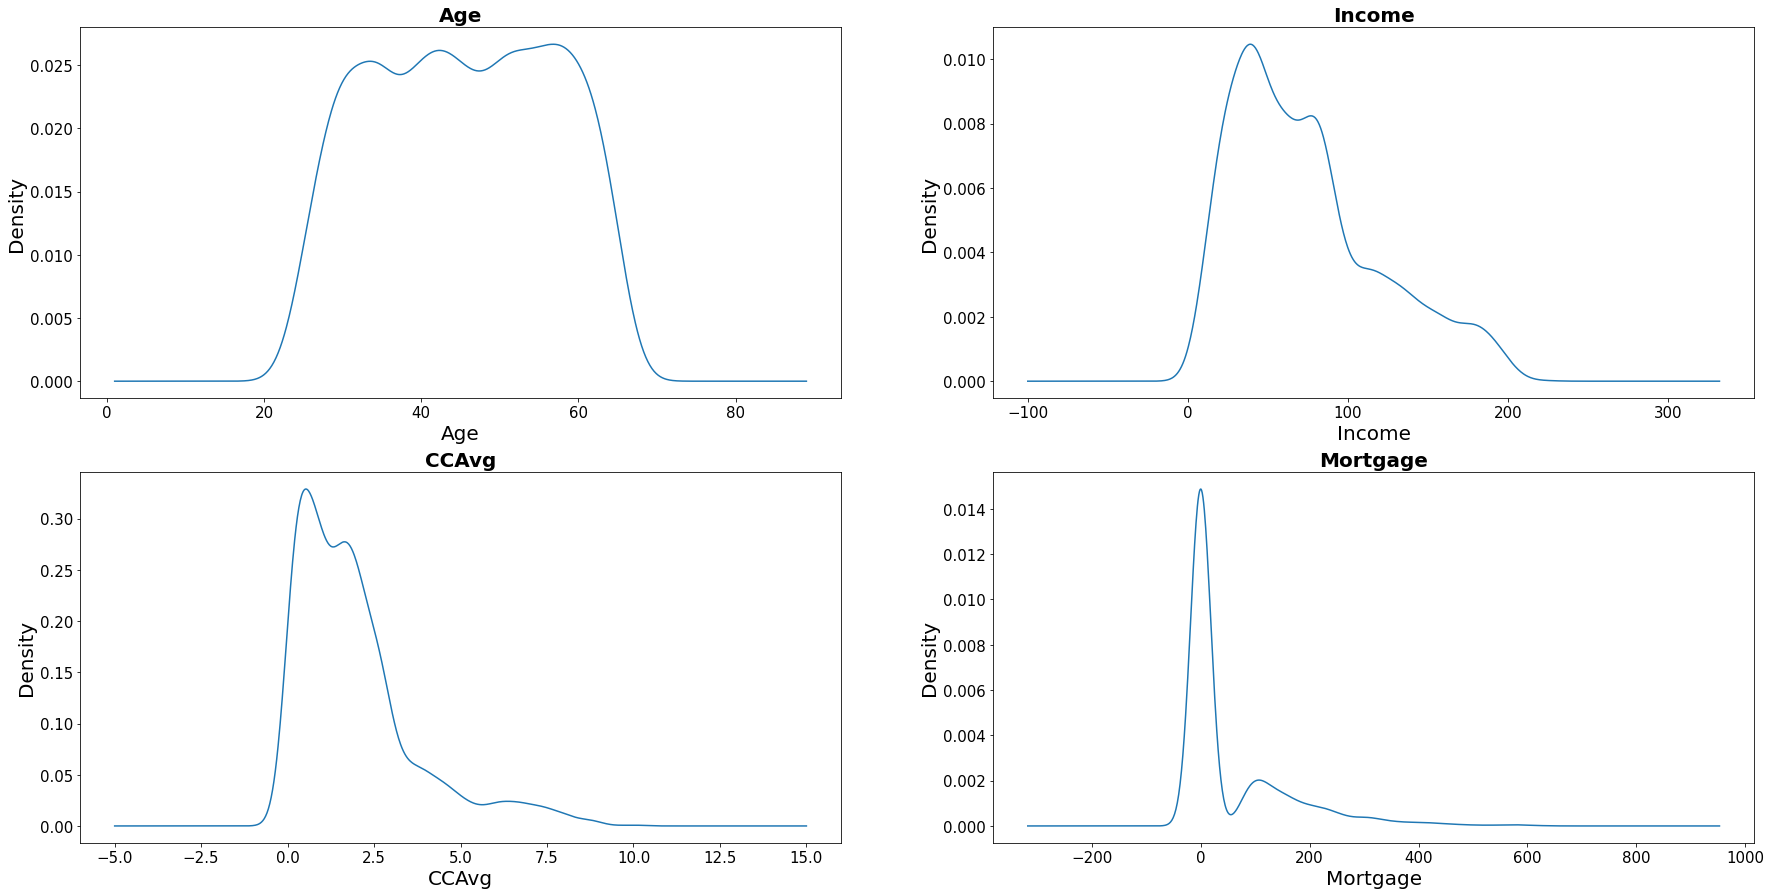

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
df['Age'].plot(kind='density')
plt.title("Age", fontsize=20, fontweight="bold")
plt.xlabel('Age',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2,2,2)
df['Income'].plot(kind='density')
plt.xlabel('Income',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.title("Income", fontsize=20, fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2,2,3)
df['CCAvg'].plot(kind='density')
plt.title("CCAvg", fontsize=20, fontweight="bold")
plt.xlabel('CCAvg',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2,2,4)
df['Mortgage'].plot(kind='density')
plt.title("Mortgage", fontsize=20, fontweight="bold")
plt.xlabel('Mortgage',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

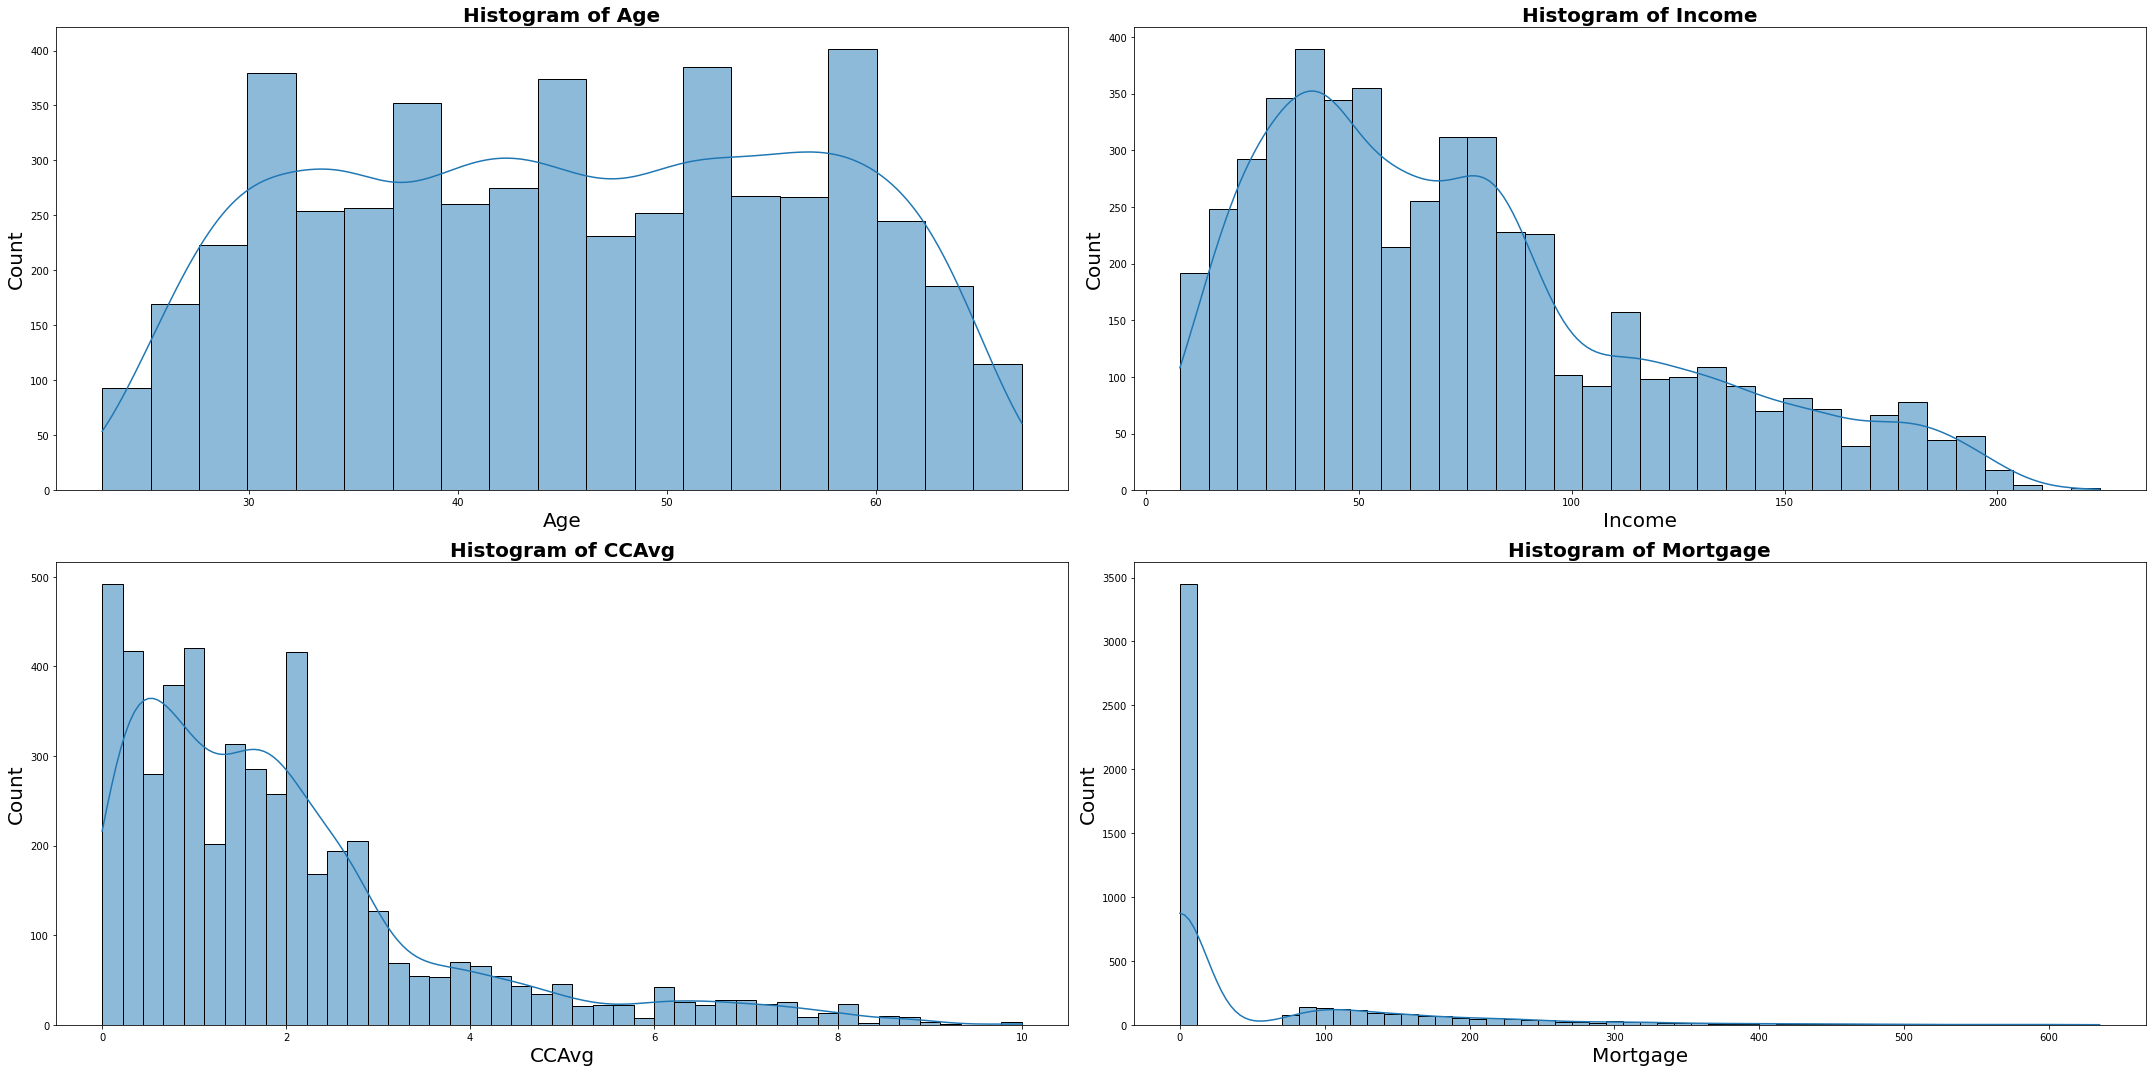

In [ ]:
dist_columns = ['Age', 'Income', 'CCAvg','Mortgage']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))

axes = axes.flatten()

for i, col in enumerate(dist_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}',fontsize=20,fontweight='bold')
    axes[i].set_xlabel(col,fontsize=20)
    axes[i].set_ylabel('Count',fontsize=20)


plt.tight_layout()
plt.show()

Box plots to show the relations and errors between each pair of variables

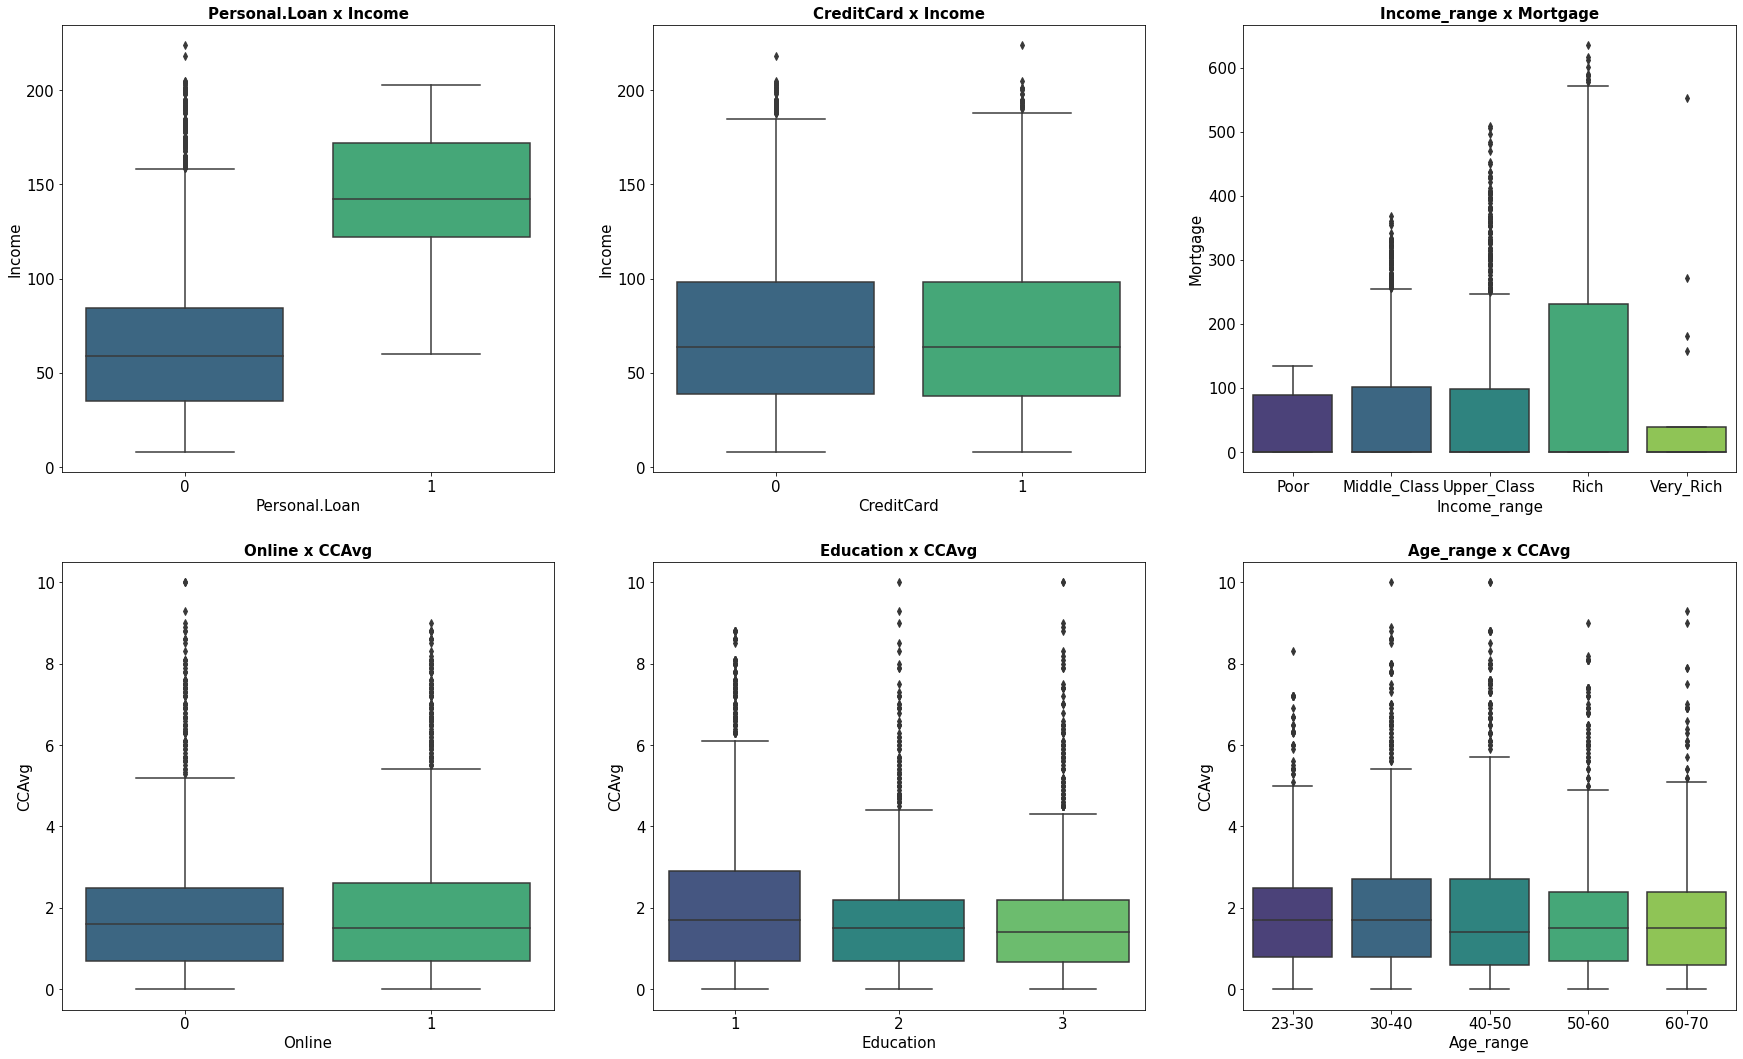

In [ ]:
plt.figure(figsize=(30,28))
plt.subplot(3,3,1)
sns.boxplot(x='Personal.Loan', y='Income', data=df, palette='viridis')
plt.xlabel('Personal.Loan',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Personal.Loan x Income',fontsize=15, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(3,3,2)
sns.boxplot(x='CreditCard', y='Income', data=df, palette='viridis')
plt.xlabel('CreditCard',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('CreditCard x Income',fontsize=15, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(3,3,3)
sns.boxplot(x='Income_r', y='Mortgage', data=df, palette='viridis')
plt.xlabel('Income_range',fontsize=15)
plt.ylabel('Mortgage',fontsize=15)
plt.title('Income_range x Mortgage',fontsize=15, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(3,3,4)
sns.boxplot(x='Online', y='CCAvg', data=df, palette='viridis')
plt.xlabel('Online',fontsize=15)
plt.ylabel('CCAvg',fontsize=15)
plt.title('Online x CCAvg',fontsize=15, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(3,3,5)
sns.boxplot(x='Education', y='CCAvg', data=df, palette='viridis')
plt.xlabel('Education',fontsize=15)
plt.ylabel('CCAvg',fontsize=15)
plt.title('Education x CCAvg',fontsize=15, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(3,3,6)
sns.boxplot(x='Age_r', y='CCAvg', data=df, palette='viridis')
plt.xlabel('Age_range',fontsize=15)
plt.ylabel('CCAvg',fontsize=15)
plt.title('Age_range x CCAvg',fontsize=15, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

We can identify that income, CCAvg and Mortgage are 3 features containing outliers

Function to identify outliers

In [ ]:
def outlier(df):

  Q1=df.quantile(0.25)

  Q3=df.quantile(0.75)

  IQR=Q3-Q1

  out = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

  return out

In [ ]:
skewed =['Income','CCAvg','Mortgage']
for col in skewed:
    outliers=outlier(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in Income : 96 ,It's Percentage is :  1.925005013033888 %


Number of outliers in CCAvg : 301 ,It's Percentage is :  6.035692801283337 %


Number of outliers in Mortgage : 291 ,It's Percentage is :  5.835171445758974 %




Outlier numbers are relatively low, yet they could better. In addition their line graphs and histograms are skewed. We found a solution to the problems by:

Find a suitable transformation for the skewed features

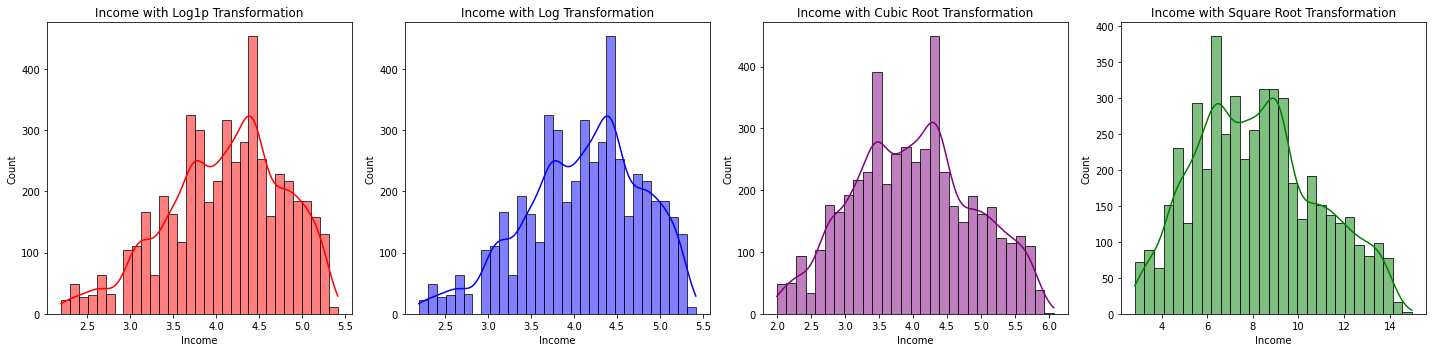

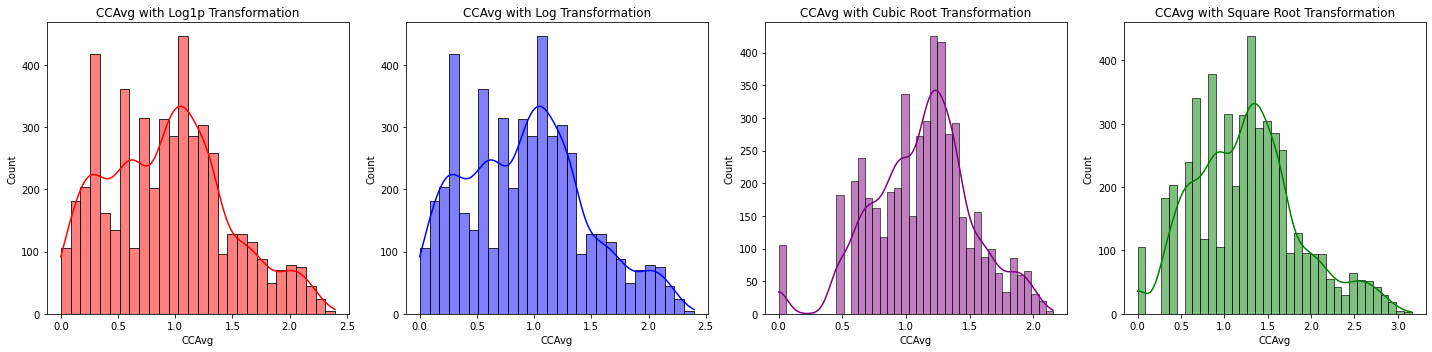

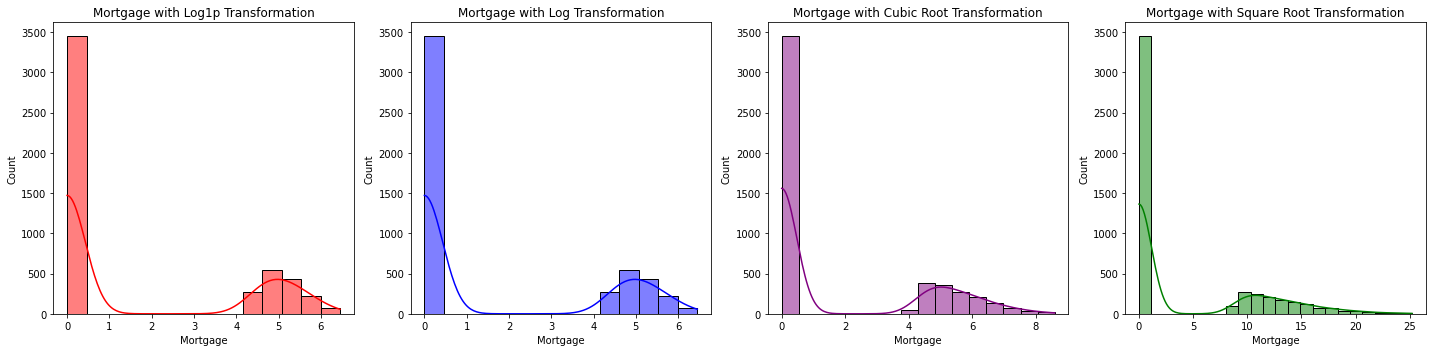

In [ ]:
skewed =['Income','CCAvg','Mortgage']

for col in skewed:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Log1p Transformation
    sns.histplot(np.log1p(df[col]), color='red', ax=axes[0],kde=True)
    axes[0].set_title(f'{col} with Log1p Transformation')

    # Log Transformation
    sns.histplot(np.log(df[col] + 1), color='blue', ax=axes[1],kde=True)
    axes[1].set_title(f'{col} with Log Transformation')

    # Cubic Root Transformation
    sns.histplot(np.cbrt(df[col]), color='purple', ax=axes[2],kde=True)
    axes[2].set_title(f'{col} with Cubic Root Transformation')

    # Square Root Transformation
    sns.histplot(np.sqrt(df[col]), color='green', ax=axes[3],kde=True)
    axes[3].set_title(f'{col} with Square Root Transformation')

    plt.tight_layout()
    plt.show()
    print("\n")

Therefore, the best suitable transformation for:
- Income: Cubic root
- CCAvg: Cubic root
- Mortgage: Square root

In [ ]:
df['Income'] = np.cbrt(df['Income'])
df['CCAvg'] = np.cbrt(df['CCAvg'])
df['Mortgage'] = np.sqrt(df['Mortgage'])

Test for outliers after the transformation and plot the histograms

In [ ]:
skewed =['Income','CCAvg','Mortgage']
for col in skewed:
    outliers=outlier(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in Income : 0 ,It's Percentage is :  0.0 %


Number of outliers in CCAvg : 109 ,It's Percentage is :  2.1856827752155605 %


Number of outliers in Mortgage : 1 ,It's Percentage is :  0.020052135552436335 %




Outliers are significantly reduced after the transformation

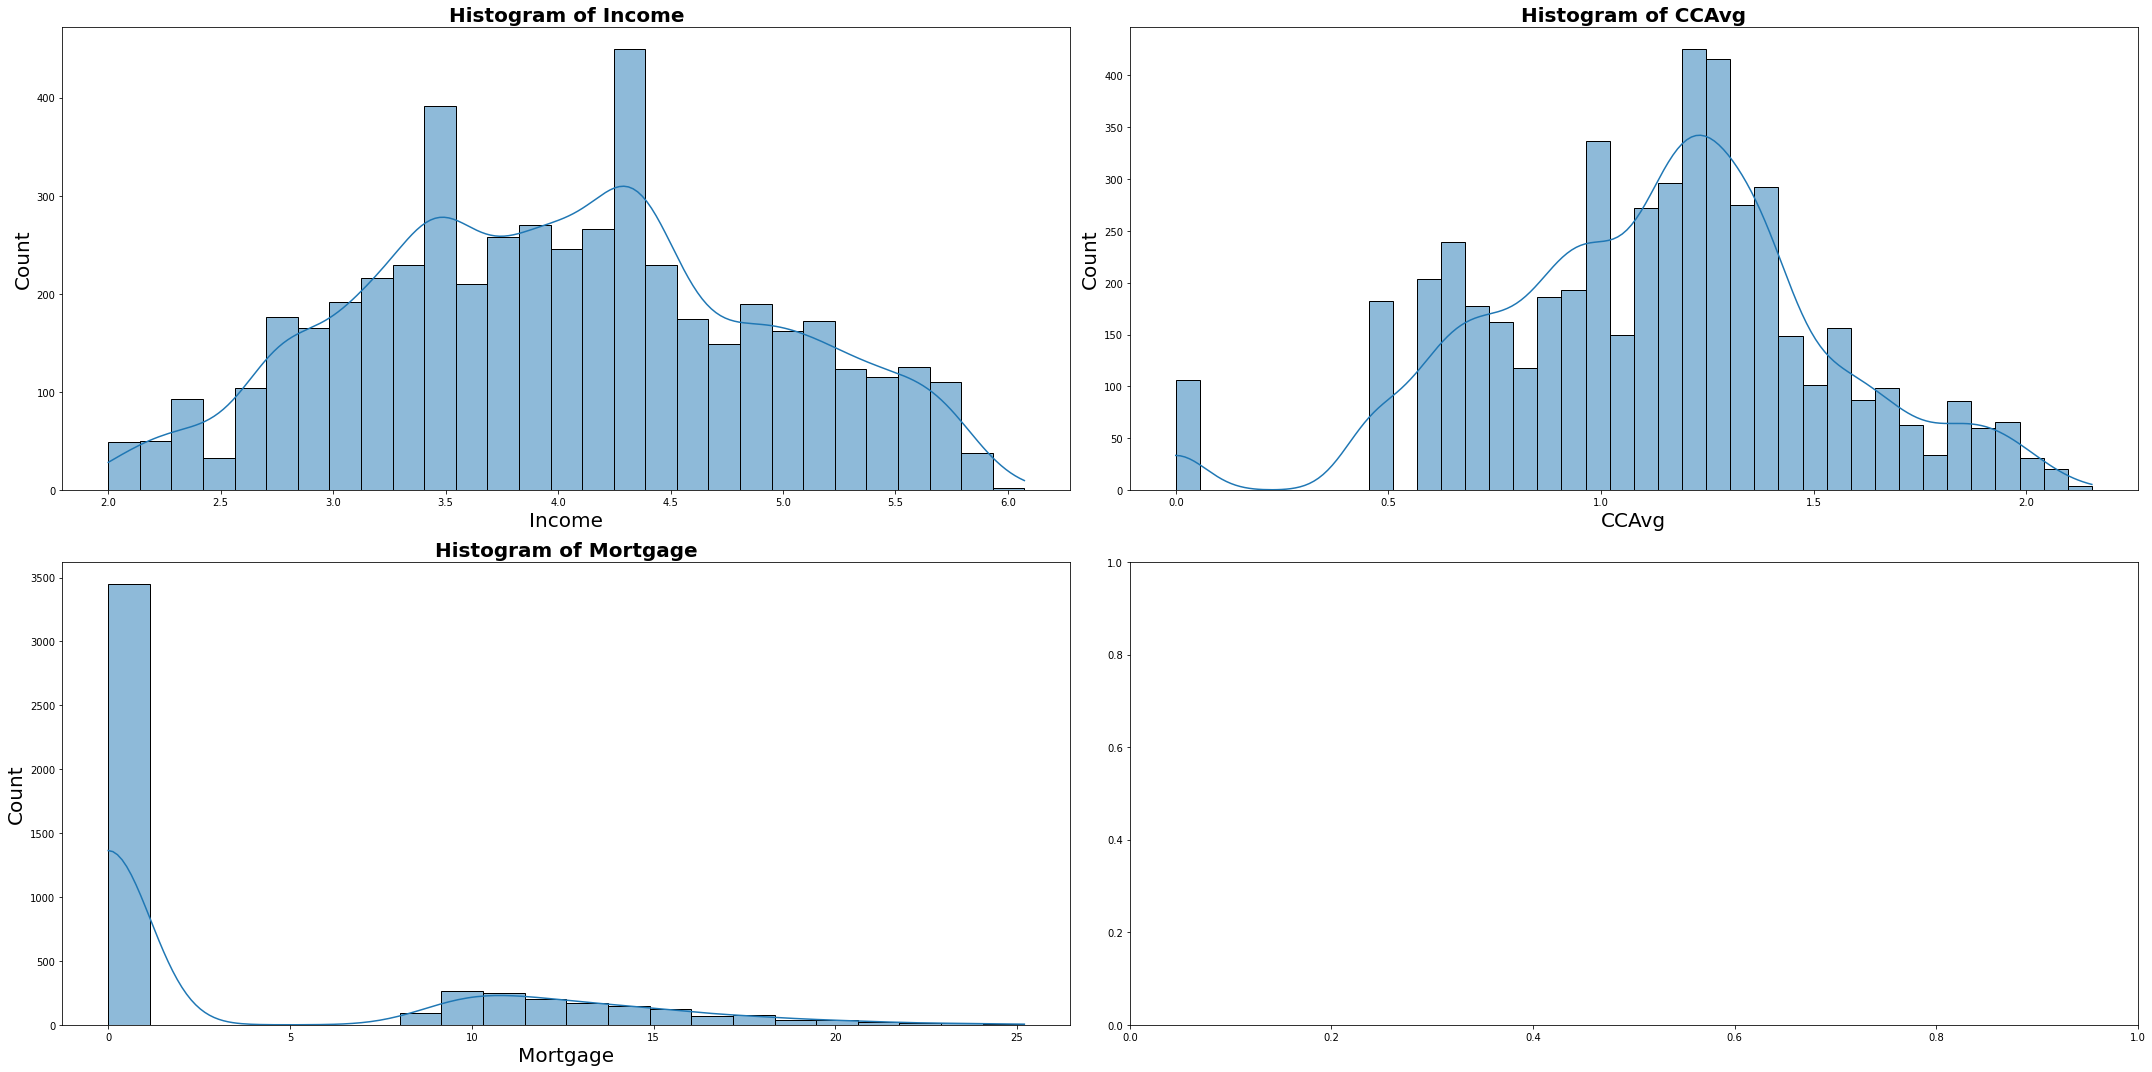

In [ ]:
dist_columns = ['Income', 'CCAvg','Mortgage']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))

axes = axes.flatten()

for i, col in enumerate(dist_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}',fontsize=20,fontweight='bold')
    axes[i].set_xlabel(col,fontsize=20)
    axes[i].set_ylabel('Count',fontsize=20)


plt.tight_layout()
plt.show()

Finally, here's a summary of our continous features

In [ ]:
df.describe()

,Age,Income,CCAvg,Mortgage
count,4987.000000,4987.000000,4987.000000,4987.000000
mean,45.347704,4.006779,1.127270,4.046775
std,11.460838,0.887801,0.392599,6.346477
min,23.000000,2.000000,0.000000,0.000000
25%,35.000000,3.391211,0.887904,0.000000
50%,45.000000,4.000000,1.144714,0.000000
75%,55.000000,4.610436,1.375069,10.049876
max,67.000000,6.073178,2.154435,25.199206
